In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("C:/Users/mmarg/OneDrive/PBS/Descriptive Analytics/Data")
products = pd.read_csv('Product_info.csv')
account = pd.read_csv('Account_info.csv')
sales = pd.read_csv('Sales_info.csv')

In [4]:
print(type(products))
products

<class 'pandas.core.frame.DataFrame'>


,encrypt_sku,product_dsc,sub_cat_cd,subcat_dsc_ext,catg_cd,cat_dsc_ext,department_cd,department_dsc_ext,brand_cd,brand_dsc,capacity_unit,conversion_factor
0,23121635,DET LÍQ MÁQ ROUPA OMO 96D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,96.00
1,23226017,DET LÍQ MÁQ ROUPA OMO 55D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,55.00
2,15751913,DET MAN PÓ ROUPA OMO 540GR,10104,det. manual roupa,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,KG,0.54
3,22159862,TOALHITAS PROTEÇÃO COR CONTINENTE 20UN,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,9798,CONTINENTE,UN,20.00
4,22765574,(I)DESINFE LIQUIDO ROUPACNT PRO 500ML,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,38313,CONT.PROTECT,LT,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2906,23992205,MASSA PANZANI MACH EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2907,23992193,MASSA PANZANI SPAG EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2908,23992199,MASSA PANZANI FARFALLE 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2909,23959868,PASTA BERRUTO ARRIGHI CONCHIGLIO 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,41369,BERRUTO,UN,1.00


In [5]:
print(type(account))
account

<class 'pandas.core.frame.DataFrame'>


,account_no,family_members,segment_gender_f,segment_gender_m,age_group,district,region,segment_cd_lifestyle,segment_dsc_lifestyle,segment_cd_lifestage,segment_dsc_lifestage
0,839904903518,5,0,0,>=65 anos,braga,litoral norte,1,Os Saudáveis Exigentes,2,Senior
1,839915544120,3,0,0,55-65 anos,braga,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
2,839958948398,4,0,0,35-45 anos,aveiro,litoral norte,3,Os Pais Práticos,4,Family With Kids
3,839960123646,17,0,0,45-55 anos,porto,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
4,839991834603,1,0,0,55-65 anos,NaN,NaN,7,Os Promocionais Atentos,3,Family With Young Adults
...,...,...,...,...,...,...,...,...,...,...,...
3108,840267515632,3,0,0,35-45 anos,setúbal,litoral sul,7,Os Promocionais Atentos,5,Active Adults
3109,840271411371,2,0,0,25-35 anos,aveiro,litoral norte,6,Os Económicos Focados,5,Active Adults
3110,840297031294,2,0,0,35-45 anos,ilha da madeira,litoral sul,1,Os Saudáveis Exigentes,5,Active Adults
3111,840297937268,1,0,0,18-25 anos,setúbal,litoral sul,2,Os Urbanos Sofisticados,3,Family With Young Adults


In [6]:
print(type(sales))
sales

<class 'pandas.core.frame.DataFrame'>


,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.000,0.89,1.09,0.0,0.10,0.00
1,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,15244838,4.000,1.63,2.00,2.0,3.15,0.00
2,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,22020944,1.000,1.94,2.39,0.8,3.15,0.00
3,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,6071048,1.000,0.82,0.87,0.0,11.26,0.09
4,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,20167550,1.000,5.36,6.59,4.4,11.26,0.66
...,...,...,...,...,...,...,...,...,...,...,...
148115,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,21862649,1.000,1.13,1.39,0.0,7.80,0.00
148116,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,19242485,1.000,0.97,1.19,0.0,7.80,0.00
148117,840019224482,2fL94Vy/w4uWWJJXhYwg+XmWdbokEpLEOyb439p7nLxnij...,20240922,P,20670689,1.000,1.27,1.35,0.0,0.20,0.00
148118,839967948997,51X+G6JcrvmpQNgT+H6UJ+4Ms1nqOr2LUsFmuwmfCPiQT5...,20241023,P,24000260,1.000,2.68,3.30,0.0,2.73,0.52


In [7]:
#Encrypted SKU & Product Name
sales_merged = sales.merge(products [['encrypt_sku','product_dsc']], on='encrypt_sku', how='left')
sales_merged.head(1)

,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt,product_dsc
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.0,0.89,1.09,0.0,0.1,0.0,(I)NACHOS COM SAL CONTINENTE 150G


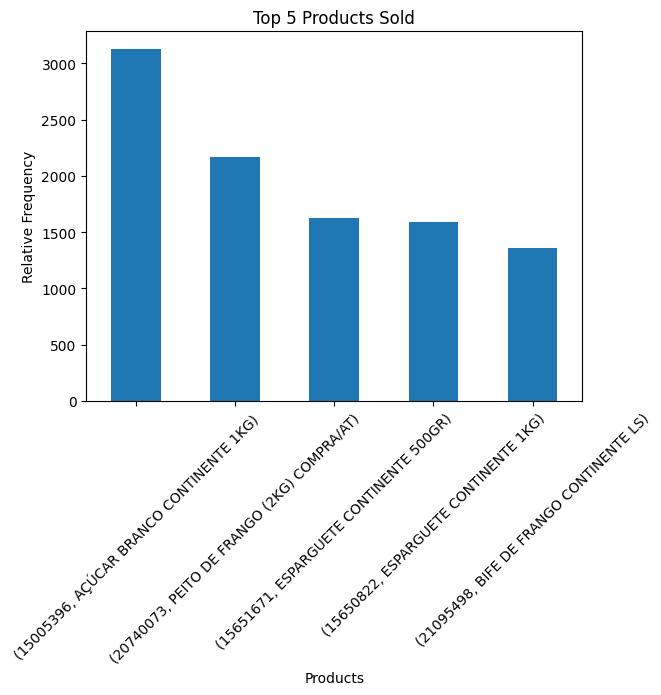

In [8]:
#Check the frequency of each product on the sales data
products_frequency = sales_merged[['encrypt_sku','product_dsc']].value_counts()
products_frequency

#Top 5 products sold
top_5_products = products_frequency.head(5)
top_5_products.plot (kind ='bar')
plt.title('Top 5 Products Sold')
plt.ylabel('Relative Frequency')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.show()

In [9]:
#Caracterization of the Transactions
transaction_sizes = sales_merged.groupby('transaction_id')['product_dsc'].count()
transaction_sizes.describe()

count    58593.000000
mean         2.527947
std          2.192949
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: product_dsc, dtype: float64

In [11]:
# Quantas transações únicas existem
num_transactions = sales_merged['transaction_id'].nunique()

# Para cada produto, contar em quantas transações ele aparece
product_transaction_counts = sales_merged.groupby('product_dsc')['transaction_id'].nunique()

# Calcular o suporte: frequência relativa de transações
product_support = product_transaction_counts / num_transactions

# Filtrar produtos com suporte >= 0.02

products_with_support = product_support[product_support >= 0.02]

print(f"Número de produtos com suporte >= 0.03: {len(products_with_support)}")
products_with_support.sort_values(ascending=False)



Número de produtos com suporte >= 0.03: 10


product_dsc
AÇÚCAR BRANCO CONTINENTE 1KG                0.053368
PEITO DE FRANGO (2KG) COMPRA/AT             0.036967
ESPARGUETE CONTINENTE 500GR                 0.028928
ESPARGUETE CONTINENTE 1KG                   0.027085
BIFE DE FRANGO CONTINENTE LS                0.023245
ARROZ BASMATI CONTINENTE 1KG                0.022545
ARROZ AGULHA CIGALA 1KG                     0.021999
PEITO FRANGO CONTINENTE LS                  0.021061
BATATA FRITA CAMPONESA CONTINENTE 175 GR    0.020770
BATATA FRITA PALHA CONT.POUPANCA 400G       0.020429
Name: transaction_id, dtype: float64

In [12]:
# Encode the Transactions
transactions = sales_merged.groupby('transaction_id')['product_dsc'].apply(list).tolist()
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)
encoded_sales.head(1)


,(AÇ) FRANGO INTEIRO C/ MIÚDOS,(AÇ) FRANGO S/MIUDOS CONG COPRAVE KG PM,(AÇ) NOVILHO ACÉM COMPRIDO CFA,(AÇ) NOVILHO BIFE DO REDONDO CFA,(AÇ) NOVILHO BIFE POJADOURO ANGUS AT KG,(AÇ) NOVILHO ESCALOPES CFA,(AÇ) NOVILHO FIGADO FRESCO CFA KG,(AÇ) NOVILHO JARDINEIRA 2ª CFA LS,(AÇ) NOVILHO MEDALHÕES CFA LS,(AÇ) NOVILHO OSSO BUCKO CFA LS,...,XILITOL BIO SEARA 250G SEARA 250G,ZERO BAR 40 G - CARAM PROZIS BX TEOR DE,ZERO BAR LOW SUGARS FUDGE PROZIS 40G,ZINCO SUPLA 40CPS,ZITI TAGLIATI DIVELLA 500GR,ZITONI RAGLIATI DIVELLA 500GR,ZMA ÉVOLUTION 60 CAPS EU NUTRITION,"\EXTRA \""\""BARRIGUINHA\""\"" 30CP\""""",ÁGUA P/FERRO PERFUMADA CONTINENTE 1LT,ÁGUA PERF P/FERRO COMFORT VAPORESSE 1L
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Run Apriori to Get Frequent Co-Purchased Products (0,2% of the transactions)
min_supp = 0.002
freq_copurchased = apriori(encoded_sales, min_support=min_supp, use_colnames=True) 
print(f"Number of Frequent Co-Purchased Products: {len(freq_copurchased)}")

Number of Frequent Co-Purchased Products: 316


In [14]:
freq_copurchased.sort_values(by= "support",ascending=False)

,support,itemsets
46,0.053368,(AÇÚCAR BRANCO CONTINENTE 1KG)
230,0.036967,(PEITO DE FRANGO (2KG) COMPRA/AT)
147,0.028928,(ESPARGUETE CONTINENTE 500GR)
146,0.027085,(ESPARGUETE CONTINENTE 1KG)
79,0.023245,(BIFE DE FRANGO CONTINENTE LS)
...,...,...
307,0.002014,"(AÇÚCAR BRANCO CONTINENTE 1KG, MAS.ESPIRAIS CO..."
218,0.002014,(NACHOS COM SAL CNT PACK POUPANÇA 300G)
208,0.002014,(MASSA LINGUINE MILANEZA 500GR)
178,0.002014,(LASANHA COM OVO CONTINENTE 500 GR)


In [15]:
freq_copurchased['length'] = freq_copurchased['itemsets'].apply(len)
print(freq_copurchased['length'].value_counts())


length
1    293
2     23
Name: count, dtype: int64


In [17]:
#Generate association rules from frequent itemsets
min_conf=0.1
rules = association_rules(freq_copurchased, metric="confidence", min_threshold=min_conf,num_itemsets=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ARROZ AGULHA CIGALA 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.021999,0.053368,0.002662,0.121024,2.267721,1.0,0.001488,1.076971,0.571603,0.036620,0.071470,0.085456
1,(ARROZ AGULHA CIGALA 1KG),(ESPARGUETE CONTINENTE 500GR),0.021999,0.028928,0.002253,0.102405,3.539949,1.0,0.001616,1.081859,0.733650,0.046283,0.075665,0.090141
2,(ARROZ AGULHA CONTINENTE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.018586,0.053368,0.003243,0.174472,3.269216,1.0,0.002251,1.146699,0.707261,0.047193,0.127931,0.117617
3,(ARROZ AGULHA CONTINENTE 1KG),(ESPARGUETE CONTINENTE 1KG),0.018586,0.027085,0.002099,0.112948,4.170096,1.0,0.001596,1.096795,0.774594,0.048179,0.088253,0.095226
4,(ARROZ AGULHA CONTINENTE 1KG),(ESPARGUETE CONTINENTE 500GR),0.018586,0.028928,0.002645,0.142332,4.920167,1.0,0.002108,1.132224,0.811844,0.058958,0.116782,0.116889
5,(ARROZ AGULHA SELECIONADO CNT 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.012920,0.053368,0.002048,0.158520,2.970320,1.0,0.001359,1.124961,0.672018,0.031881,0.111080,0.098448
6,(ARROZ VAPORIZADO CONTINENTE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.019251,0.053368,0.002697,0.140071,2.624616,1.0,0.001669,1.100825,0.631142,0.038565,0.091591,0.095299
7,(ARROZ VAPORIZADO CONTINENTE 1KG),(ESPARGUETE CONTINENTE 1KG),0.019251,0.027085,0.002748,0.142730,5.269696,1.0,0.002226,1.134900,0.826140,0.063038,0.118865,0.122090
8,(ESPARGUETE CONTINENTE 1KG),(ARROZ VAPORIZADO CONTINENTE 1KG),0.027085,0.019251,0.002748,0.101449,5.269696,1.0,0.002226,1.091478,0.832792,0.063038,0.083811,0.122090
9,(ARROZ VAPORIZADO CONTINENTE 1KG),(ESPARGUETE CONTINENTE 500GR),0.019251,0.028928,0.002065,0.107270,3.708107,1.0,0.001508,1.087755,0.744656,0.044782,0.080675,0.089328


Número de combinações com suporte >= 0.002: 23


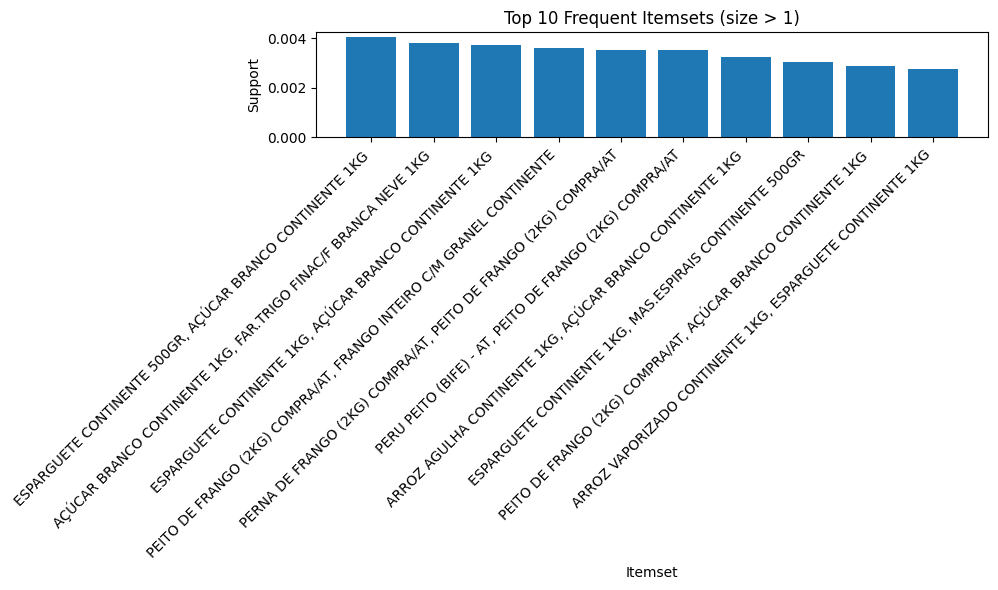

In [18]:
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

# Run Apriori with lower support
min_supp = 0.002  # 0.2%
freq_copurchased = apriori(encoded_sales, min_support=min_supp, use_colnames=True)

# Add length of itemset
freq_copurchased['length'] = freq_copurchased['itemsets'].apply(lambda x: len(x))

# Filter itemsets with more than 1 item (i.e., combinations)
filtered = freq_copurchased[freq_copurchased['length'] > 1]

# Check if there are any
print(f"Número de combinações com suporte >= {min_supp}: {len(filtered)}")

if not filtered.empty:
    # Get top 10 by support
    top10 = filtered.sort_values(by='support', ascending=False).head(10)
    
    # Convert sets to strings for labeling
    top10['itemset_str'] = top10['itemsets'].apply(lambda x: ', '.join(x))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(top10['itemset_str'], top10['support'])
    plt.title("Top 10 Frequent Itemsets (size > 1)")
    plt.xlabel("Itemset")
    plt.ylabel("Support")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Ainda não há itemsets de tamanho > 1 com esse suporte mínimo.")


In [19]:
from mlxtend.frequent_patterns import association_rules

# Gerar regras
rules = association_rules(freq_copurchased, metric="confidence", min_threshold=0.2)

# Adicionar coluna com o número de itens no antecedente
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

# Filtrar regras com pelo menos 1 item no antecedente e suporte mínimo
rules_filtered = rules[(rules['antecedent_len'] >= 1) & (rules['support'] >= 0.002)]

# Ordenar por lift e mostrar as top 10
top10_rules = rules_filtered.sort_values(by='lift', ascending=False).head(10)

# Mostrar colunas relevantes
top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
2,(BATATA FRITA ONDULADA PRESUNTO CNT 175 G),(BATATA FRITA CAMPONESA CONTINENTE 175 GR),0.002458,0.208092,10.018704
3,(MAS.ESPIRAIS CONTINENTE 500GR),(ESPARGUETE CONTINENTE 1KG),0.003055,0.211085,7.793382
0,(FAR TRIGO C/FER SUP FINA CONTINENTE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.002577,0.399471,7.485193
4,(PERNA DE FRANGO (2KG) COMPRA/AT),(PEITO DE FRANGO (2KG) COMPRA/AT),0.003499,0.244048,6.601792
5,(PERU PEITO (BIFE) - AT),(PEITO DE FRANGO (2KG) COMPRA/AT),0.003499,0.229050,6.196096
1,(FAR.TRIGO FINAC/F BRANCA NEVE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.003789,0.323144,6.054999


In [20]:
# Número total de transações
num_transacoes = sales_merged['transaction_id'].nunique()

# Quantas transações contêm cada produto
transacoes_por_produto = sales_merged.groupby('product_dsc')['transaction_id'].nunique()

# Suporte de cada produto individual (como proporção)
suporte_produto = transacoes_por_produto / num_transacoes

# Soma total dos suportes dos produtos únicos
soma_total_suportes = suporte_produto.sum()

print(f"Número de transações: {num_transacoes}")
print(f"Número de produtos únicos: {len(suporte_produto)}")
print(f"Soma total dos suportes dos produtos: {soma_total_suportes:.4f}")


Número de transações: 58593
Número de produtos únicos: 2908
Soma total dos suportes dos produtos: 2.5279


In [ ]:
media_produtos_por_transacao = sales_merged.groupby('transaction_id')['product_dsc'].count().mean()
print(f"Média de produtos por transação: {media_produtos_por_transacao:.2f}")
print(f"Soma dos suportes / média produtos/transação ≈ {soma_total_suportes / media_produtos_por_transacao:.2f}")


Média de produtos por transação: 2.53
Soma dos suportes / média produtos/transação ≈ 1.00
